## Exploring Tf-IDF

In this notebook you will be exploring the computation of the Tf-IDF feature using a very popular dataset called 20 newsgroups.

The resources you should use to complete this notebook are:
1.  https://en.wikipedia.org/wiki/Tf%E2%80%93idf
2.  http://www.tfidf.com/

the 20 newsgroups by date dataset
Number of posts 11314


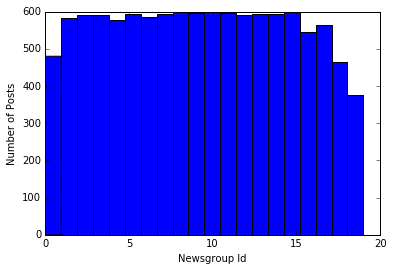

First post!
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [1]:
%matplotlib inline
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

post_texts = data.data
news_group_ids = data.target

print data.description

print "Number of posts", len(data.data)
import matplotlib.pyplot as plt
plt.hist(data.target, bins=20)
plt.xlabel('Newsgroup Id')
plt.ylabel('Number of Posts')
plt.show()

print "First post!"
print data.data[0]

Next, you will be writing a function to compute the term frequency part of [Tf-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).  It's up to you how fancy to make this function.  In my simple version, I used split after first removing leading or trailing punctuation (I used the `strip` function) and also converting the words to lower case.

In [42]:
import re

def tf(text):
    """ Returns a dictionary where keys are words that occur in text
        and the value is the number of times that each word occurs. """
    res = {}
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    wordList = regex.sub('', text).lower().split() #remove punctuation, make lower case, and split into list of words
    for i in range(0, len(wordList)):
        if wordList[i] not in res:
            #res hasn't seen this word so add it to the dictionary with a count of 1
            res[wordList[i]] = 1
        else:
            #res has seen this word so find the value of this word and increment by 1
            res[wordList[i]] += 1
    return res

tf(data.data[0])

{u'2door': 1,
 u'60s': 1,
 u'70s': 1,
 u'a': 3,
 u'addition': 1,
 u'all': 1,
 u'anyone': 2,
 u'be': 1,
 u'body': 1,
 u'bricklin': 1,
 u'bumper': 1,
 u'called': 1,
 u'can': 1,
 u'car': 4,
 u'could': 1,
 u'day': 1,
 u'doors': 1,
 u'early': 1,
 u'email': 1,
 u'engine': 1,
 u'enlighten': 1,
 u'from': 2,
 u'front': 1,
 u'funky': 1,
 u'have': 1,
 u'history': 1,
 u'i': 3,
 u'if': 2,
 u'in': 1,
 u'info': 1,
 u'is': 2,
 u'it': 2,
 u'know': 1,
 u'late': 1,
 u'looked': 1,
 u'looking': 1,
 u'made': 1,
 u'me': 1,
 u'model': 1,
 u'name': 1,
 u'of': 2,
 u'on': 2,
 u'or': 1,
 u'other': 1,
 u'out': 1,
 u'please': 1,
 u'production': 1,
 u'really': 1,
 u'rest': 1,
 u'saw': 1,
 u'separate': 1,
 u'small': 1,
 u'specs': 1,
 u'sports': 1,
 u'tellme': 1,
 u'the': 6,
 u'there': 1,
 u'this': 4,
 u'to': 1,
 u'was': 4,
 u'were': 1,
 u'whatever': 1,
 u'where': 1,
 u'wondering': 1,
 u'years': 1,
 u'you': 1}

I manually verified that my tf function is working as expected by choosing a word shown in the dictionary and counting how many times it appears in the first post.

Next, you will be writing a function to compute the inverse document frequency part of [Tf-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

In [43]:
from math import log
import operator

def idf(data):
    """ Returns a dictionary where the keys are words and the values are inverse
        document frequencies.  For this function you should use the formula
        idf(w, data) = log(N / |text in data that contain the word w|) """
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    res = {}
    for i in range(0, len(data)):  #in this function we are looping through all the posts
        wordList = list(set(regex.sub('', data[i]).lower().split()))  #for each document, get the list of words with
        #no repeats, this will let us count the number of documents that contain a given word
        for i in range(0, len(wordList)):
            if wordList[i] not in res:
                #res hasn't seen the word before so it's in this document
                res[wordList[i]] = 1
            else:
                #res has seen the word before in a previous document so increment a count of # of documents word appears in
                res[wordList[i]] += 1
    res = {k: log(float(len(data))/v) for k,v in res.items()} #actually calculate idf for each word
    return res

idf = idf(data.data)
sorted_idf = sorted(idf.items(), key=operator.itemgetter(1))

print "Lowest IDF (most common)"
for d in sorted_idf[0:10]:
    print d
    
print ""
print "Highest IDF (least common)"
rev_sorted_idf = sorted(idf.items(), key=operator.itemgetter(1))
for d in reversed(rev_sorted_idf[-10:]):
    print d

Lowest IDF (most common)
(u'the', 0.17780639867699963)
(u'to', 0.2921111699570584)
(u'a', 0.3085812880536072)
(u'and', 0.37834805355570833)
(u'of', 0.3893763845971865)
(u'i', 0.44614348557751443)
(u'in', 0.4694734533916627)
(u'is', 0.4778476418510821)
(u'that', 0.5596378846971432)
(u'it', 0.5821634734308023)

Highest IDF (least common)
(u'jawbone', 9.333796175903101)
(u'mi2ditm2wvbgt3tdi2gtrc8ws14sy0cstdi2di', 9.333796175903101)
(u'mx3734ubq34lgu7t72qt7utxuu2plqt', 9.333796175903101)
(u'axixuya1mhrkh3k10ugt50y3cb7tyv', 9.333796175903101)
(u'230650', 9.333796175903101)
(u'echte', 9.333796175903101)
(u'md2qvgqvf1q3j1afdod3iid3hz3hzyi3j1d88zaizhaiz', 9.333796175903101)
(u'geysers', 9.333796175903101)
(u'q700900', 9.333796175903101)
(u'135mb', 9.333796175903101)


Based off of these results, it appears that the idf function is working as expected. The least common words appear to be mispellings or contain strings of numbers. I am not sure why they are in the posts but it makes sense that they are the least common since they are the most unqiue.

The last step in Tf-IDF is to compute the product of tf and IDF for each document, and then convert the resultant dictionary of Tf-IDF features into a vector.  We'll be discussing this next class.

## Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

## Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

## Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.